In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import seaborn as sns
import plotly_express as px
import math
import plotly

In [2]:
food_access_df=gpd.read_file('../data/Raw Data/NeighborhoodFoodRetail.geojson.json')

In [3]:
food_access_res_df = food_access_df[food_access_df['NON_RESIDENTIAL']== 'No']

### My Analysis: 
In the above steps, I loaded my data and coded out the nonresidential categories to get the data set I want to work with: food_access_res_df

In [4]:
food_access_res_df.shape

(1325, 17)

In [5]:
food_access_res_df

,OBJECTID,GEOID10,NON_RESIDENTIAL,TOTAL_LPSS,LPSS_PER1000,TOTAL_HPSS,HPSS_PER1000,PCT_HPSS,HPSS_ACCESS,SUPERMARKET_ACCESS,PCT_VEHICLE_AVAILABILITY,TOTAL_RESTAURANTS,PCT_POVERTY,HIGH_POVERTY,Shape__Area,Shape__Length,geometry
0,1,421010108001,No,25.0,30.674847,2.50,3.067485,9.090909,Moderate or High Access,Yes,44.268775,0,54.969325,Yes,2.759421e+05,3260.316044,"POLYGON ((-75.1985147835869 39.9694490669934, ..."
1,2,421010108002,No,21.0,28.806584,1.75,2.400549,7.692308,Moderate or High Access,Yes,67.611336,2,37.860082,Yes,1.768809e+05,1736.152373,"POLYGON ((-75.1978337828035 39.965705066843, -..."
2,3,421010109002,No,7.0,17.114914,0.50,1.222494,6.666667,Low Access,No,37.356322,1,57.212714,Yes,7.452003e+04,1211.853466,"POLYGON ((-75.18765677983789 39.9644950666312,..."
3,4,421010110002,No,15.0,19.480519,2.75,3.571429,15.492958,Moderate or High Access,Yes,52.824859,0,19.480519,No,1.857720e+05,2057.362419,"POLYGON ((-75.2098357868676 39.9735130677027, ..."
4,5,421010110001,No,17.0,25.914634,2.50,3.810976,12.820513,Moderate or High Access,Yes,70.408163,1,52.134146,Yes,2.424869e+05,4166.159591,"POLYGON ((-75.19854878379449 39.9733040682377,..."
5,6,421010110003,No,16.0,16.931217,2.75,2.910053,14.666667,Moderate or High Access,Yes,18.119266,2,80.952381,Yes,1.898971e+05,2197.117201,"POLYGON ((-75.20662678553509 39.9752550686491,..."
6,7,421010111004,No,24.0,27.272727,3.75,4.261364,13.513514,Moderate or High Access,Yes,37.220844,6,55.660377,Yes,2.511867e+05,2295.091444,"POLYGON ((-75.2264787918711 39.9748490670738, ..."
7,8,421010111002,No,32.0,93.023256,4.75,13.808140,12.925170,Moderate or High Access,Yes,63.461538,4,8.139535,No,4.247028e+05,3237.790054,"POLYGON ((-75.2198187905811 39.9736370672828, ..."
8,9,421010111003,No,27.0,51.039698,3.25,6.143667,10.743802,Moderate or High Access,Yes,55.776892,15,15.879017,No,1.478285e+05,1796.936886,"POLYGON ((-75.2226147902785 39.9721280670444, ..."
9,10,421010111001,No,31.0,55.956679,5.00,9.025271,13.888889,Moderate or High Access,Yes,88.333333,4,57.761733,Yes,1.061348e+06,4395.308739,"POLYGON ((-75.2124227874516 39.9739910673888, ..."


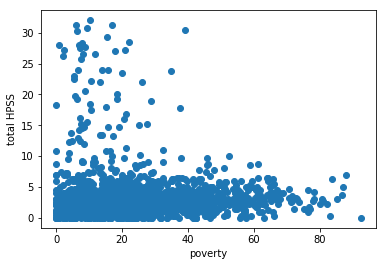

In [6]:
x=food_access_res_df['PCT_POVERTY']
y=food_access_res_df['TOTAL_HPSS']

plt.xlabel('poverty')
plt.ylabel('total HPSS')
plt.scatter(x, y)


### My Analysis:
In this graph, I wanted to look at the relationship between High Quality Produce Stores and the Percentage of Poverty in an area. There are only high quality produce stores in areas of lower poverty percentages. There are no high quality produce stores in areas with higher than 40 % poverty. This hints that there is a strong relationship between poverty and food access. 

<div class="alert alert-info">
    <li>You need to look more closely as these claims:
    <blockquote>There are only high quality produce stores in areas of lower poverty percentages. There are no high quality produce stores in areas with higher than 40 % poverty.</blockquote> and state them differently based on some counts and perhaps histograms.</li>
</div>

In [34]:
# CODE SUGGESTION
(food_access_res_df[food_access_res_df['PCT_POVERTY']>40][['TOTAL_HPSS']]>0).sum()

TOTAL_HPSS    306
dtype: int64

In [24]:
food_access_res_df[food_access_res_df['PCT_POVERTY']>40][['TOTAL_HPSS']]>0

,TOTAL_HPSS
0,True
2,True
4,True
5,True
6,True
9,True
11,True
12,True
14,True
35,True


In [26]:
food_access_res_df[food_access_res_df['PCT_POVERTY']>40]['TOTAL_HPSS'].max()

10.0

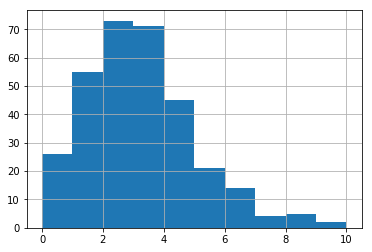

In [27]:
food_access_res_df[food_access_res_df['PCT_POVERTY']>40]['TOTAL_HPSS'].hist()

In [35]:
# END OF CODE SUGGESTION

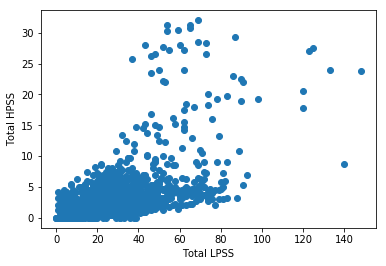

In [7]:
x=food_access_res_df['TOTAL_LPSS']
y=food_access_res_df['TOTAL_HPSS']

plt.xlabel('Total LPSS')
plt.ylabel('Total HPSS')


plt.scatter(x, y)



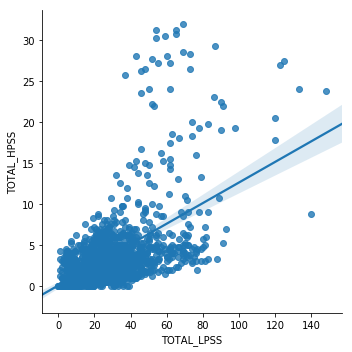

In [8]:
sns.lmplot(x='TOTAL_LPSS', y='TOTAL_HPSS', data=food_access_res_df)

### My Analysis: 
Here, I wanted to look at the relationship between high quality and low quality produce stores. For example, I wanted to see that if there is a prevalence of high quality stores, would there be less lower quality produce stores? From the two graphs above, it appears that if there are fewer lower quality produce stores, then there are fewer high quality produce stores, meaning likely there are areas with just less food stores overall. I wonder if this is due to the fact that there may be fewer stores in general in areas with a lower population.

<div class="alert alert-info">
    <li>the scatter plot with regression lines suggests a positive relationship between the variables - if it was as you suggest, i.e. more HPSS associated with less HPSS then this would negative.</li>
    <li>You can check using the <code>corr()</code> function to look at the correlation coefficient between the two</li>
</div>

In [32]:
# CODE SUGGESTION
food_access_res_df[['LPSS_PER1000','HPSS_PER1000']].corr()

,LPSS_PER1000,HPSS_PER1000
LPSS_PER1000,1.000000,0.562254
HPSS_PER1000,0.562254,1.000000


In [33]:
# END OF CODE SUGGESTION

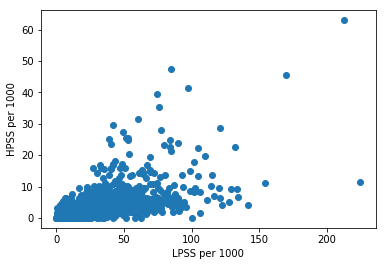

In [9]:
x=food_access_res_df['LPSS_PER1000']
y=food_access_res_df['HPSS_PER1000']

plt.xlabel('LPSS per 1000')
plt.ylabel('HPSS per 1000')


plt.scatter(x, y)

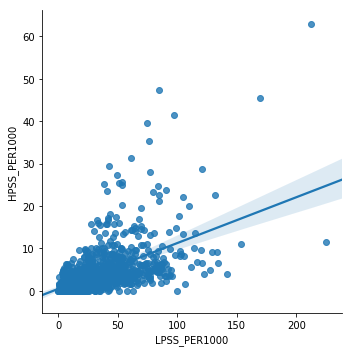

In [10]:
sns.lmplot(x='LPSS_PER1000', y='HPSS_PER1000', data=food_access_res_df)

### My Analysis: 
Again, it seems like if there are less HPSS food stores, there are less LPSS stores. This makes sense because if there are less stores in general - there would be less of both LPSS and HPSS.

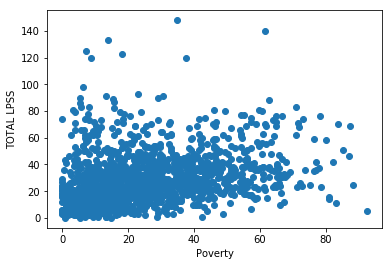

In [11]:
x=food_access_res_df['PCT_POVERTY']
y=food_access_res_df['TOTAL_LPSS']

plt.xlabel('Poverty')
plt.ylabel('TOTAL LPSS')

plt.scatter(x, y)

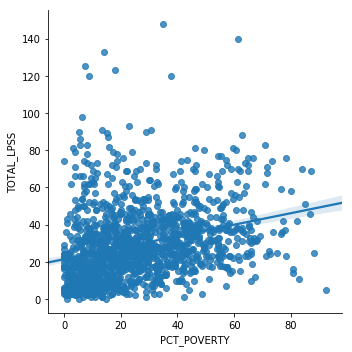

In [12]:
fig1=sns.lmplot(x='PCT_POVERTY', y='TOTAL_LPSS', data=food_access_res_df)

In [13]:
fig1.savefig("LPSS_POVERTY.png")

### My Analysis: 
In this graph, I wanted to see if there was a strong relationship between LPSS and Poverty. There is a slightly upward trend between the number of LPSS and percentage of poverty in a given area.

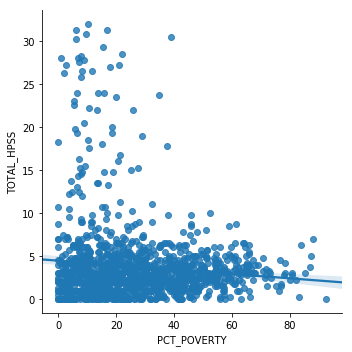

In [14]:
fig2=sns.lmplot(x='PCT_POVERTY', y='TOTAL_HPSS', data=food_access_res_df)


In [15]:
fig2.savefig('HPSS_POVERTY.png')

### My Analysis: 
Here, there is a slight downward trend between HPSS and percentage of poverty. From the graph, there are far more healthy food stores in areas with lower poverty rates than in areas with a percentage over 40.

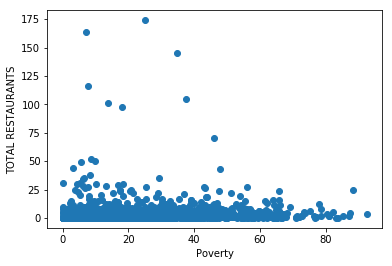

In [16]:
x=food_access_res_df['PCT_POVERTY']
y=food_access_res_df['TOTAL_RESTAURANTS']

plt.xlabel('Poverty')
plt.ylabel('TOTAL RESTAURANTS')


plt.scatter(x, y)

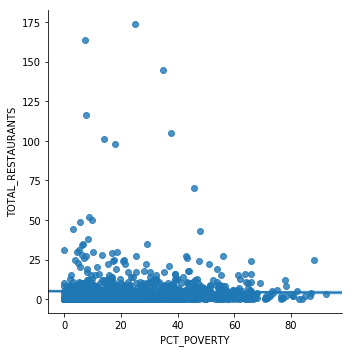

In [17]:
sns.lmplot(x='PCT_POVERTY', y='TOTAL_RESTAURANTS', data=food_access_res_df)

### My Analysis: 
There seems to be no relationship between the amount of restaurants and poverty in a given area. 

# Next Steps: 
* I have done some preliminary analysis of the relationship between some of my variables
* It appears that if there are fewer lower quality produce stores, then there are fewer high quality produce stores, meaning likely there are areas with just less food stores overall
* There is a slightly positive relationship between LPSS and Poverty Rates 
* There is a slightly negative relationship between HPSS and Poverty Rates

In my next notebook, I will map the different variables across Philadelphia. 